In [1]:
import pandas as pd
import yfinance as yf

In [2]:
start = "2022-02-01"
end = "2023-03-01"

symbol = "005930.KS"

In [3]:
samsung = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
print(samsung)

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2022-02-03  74900.0  74900.0  73300.0  73300.0  71537.976562  17744721
2022-02-04  74300.0  74600.0  73400.0  74000.0  72221.156250  12730034
2022-02-07  73500.0  73600.0  72400.0  73000.0  71245.195312  14240838
2022-02-08  73000.0  73000.0  73000.0  73000.0  71245.195312         0
2022-02-09  73000.0  73000.0  73000.0  73000.0  71245.195312         0
...             ...      ...      ...      ...           ...       ...
2023-02-22  61500.0  61800.0  61000.0  61100.0  61100.000000     39178
2023-02-23  61700.0  62500.0  61500.0  62000.0  62000.000000     37145
2023-02-24  62300.0  62600.0  61300.0  61300.0  61300.000000     50792
2023-02-27  60800.0  60800.0  60200.0  60500.0  60500.000000  11155697
2023-02-28  60800.0  61400.0  60500.0  60600.0  60600.000000  13715861

[265 rows x 6 columns]


In [5]:
import matplotlib.pyplot as plt

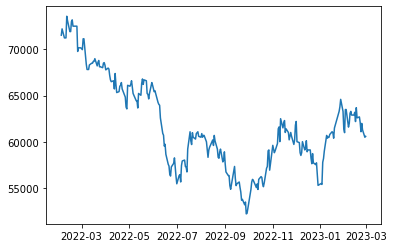

In [6]:
plt.plot(samsung['Adj Close'])
plt.show()

In [7]:
# 휴장일 제거
new_samsung = samsung[samsung['Volume'] != 0]

new_samsung['Close'].head(10)



Date
2022-02-03    73300.0
2022-02-04    74000.0
2022-02-07    73000.0
2022-02-10    75400.0
2022-02-11    74900.0
2022-02-14    73700.0
2022-02-15    73700.0
2022-02-16    74800.0
2022-02-17    75000.0
2022-02-18    74300.0
Name: Close, dtype: float64

In [8]:
# 이동평균선 : 일정 기간 동안의 주가를 산술 평균한 값인 주가이동평균을 차례로 연결해 만든 선
ma5 = samsung['Adj Close'].rolling(window=5).mean()

# MA5라는 열 추가
new_samsung.insert(len(new_samsung.columns),"MA5",ma5)

new_samsung.tail(10)
# ma20
ma20 = samsung['Adj Close'].rolling(window=20).mean()
new_samsung.insert(len(new_samsung.columns),"MA20",ma20)

ma60 = samsung['Adj Close'].rolling(window=60).mean()
new_samsung.insert(len(new_samsung.columns),"MA60",ma60)

ma120 = samsung['Adj Close'].rolling(window=120).mean()
new_samsung.insert(len(new_samsung.columns),"MA120",ma120)

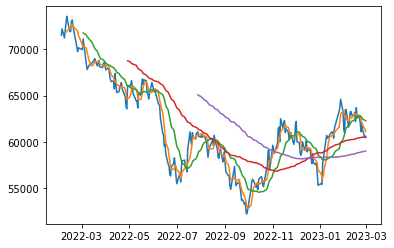

In [9]:
plt.plot(new_samsung.index,new_samsung['Adj Close'],label='Close')
plt.plot(new_samsung.index,new_samsung['MA5'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA20'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA60'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA120'],label='Adj Close')


In [10]:
ma5 = new_samsung['Close'].rolling(window=5).mean().head(10)
ma5

Date
2022-02-03        NaN
2022-02-04        NaN
2022-02-07        NaN
2022-02-10        NaN
2022-02-11    74120.0
2022-02-14    74200.0
2022-02-15    74140.0
2022-02-16    74500.0
2022-02-17    74420.0
2022-02-18    74300.0
Name: Close, dtype: float64

In [11]:
# 새로운 창으로 출력
%matplotlib

Using matplotlib backend: Qt5Agg


In [12]:
plt.plot(new_samsung.index,new_samsung['Adj Close'],label='Close')
plt.plot(new_samsung.index,new_samsung['MA5'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA20'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA60'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA120'],label='Adj Close')